In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.utils import plot_model

#Load and preprocess the image dataset

In [2]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


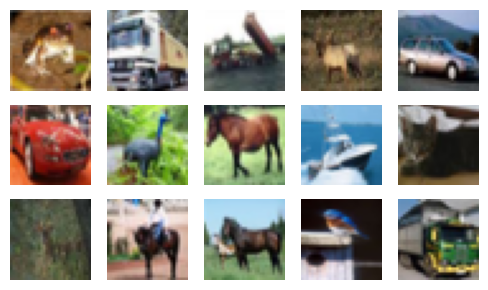

In [3]:
fig, axes = plt.subplots(3, 5, figsize=(5, 3))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(train_images[i])
    #ax.set_title(f'Label: {train_images[i][0]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Normalizing the dataset

In [4]:
train_images,test_images = train_images/255.0,test_images/255.0

##Building the CNN model

In [18]:
model = models.Sequential([

    # Block 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Classifier
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


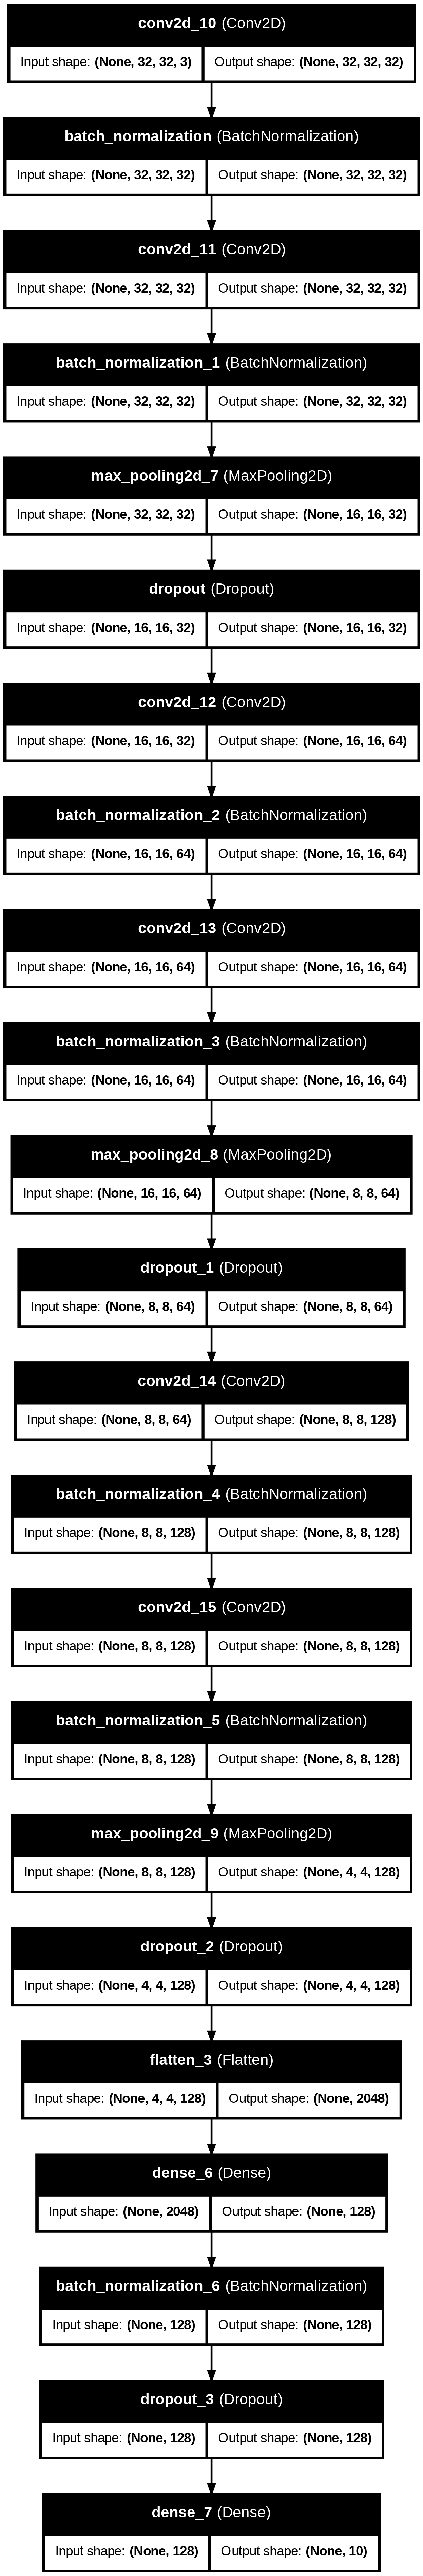

In [19]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Training the model

In [20]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.3889 - loss: 1.8573 - val_accuracy: 0.6690 - val_loss: 0.9372
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.6426 - loss: 1.0254 - val_accuracy: 0.7176 - val_loss: 0.7977
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7061 - loss: 0.8496 - val_accuracy: 0.7496 - val_loss: 0.7191
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7446 - loss: 0.7438 - val_accuracy: 0.7772 - val_loss: 0.6461
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7711 - loss: 0.6634 - val_accuracy: 0.7605 - val_loss: 0.6961
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7906 - loss: 0.6169 - val_accuracy: 0.7915 - val_loss: 0.6153
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8056 - loss: 0.5656 - val_accuracy: 0.8217 - val_loss: 0.5304
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8238 - loss: 0.5176 - val_a

In [21]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8495 - loss: 0.4356 - val_accuracy: 0.8216 - val_loss: 0.5662
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8607 - loss: 0.4085 - val_accuracy: 0.8355 - val_loss: 0.4959
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8649 - loss: 0.3940 - val_accuracy: 0.8410 - val_loss: 0.4820
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8717 - loss: 0.3783 - val_accuracy: 0.8440 - val_loss: 0.4781
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8768 - loss: 0.3645 - val_accuracy: 0.8343 - val_loss: 0.5106
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8843 - loss: 0.3428 - val_accuracy: 0.8466 - val_loss: 0.4848
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8859 - loss: 0.3330 - val_accuracy: 0.8486 - val_loss: 0.4810
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8906 - loss: 0.318

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - 3ms/step - accuracy: 0.8606 - loss: 0.4507
Test accuracy: 0.8605999946594238


#Accuracy Plot

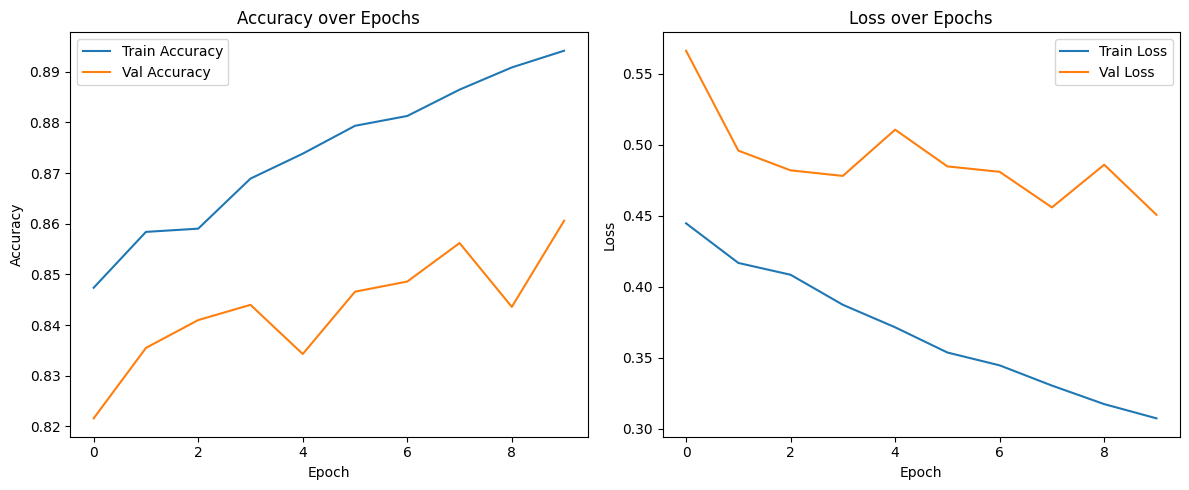

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [26]:

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\n Model Evaluation Complete")
print(f" Test Accuracy : {test_acc:.4f}")
print(f" Test Loss     : {test_loss:.4f}")

if test_acc > 0.80:
    print(" Great job! Your model is performing well.")
else:
    print("Changes needed")



313/313 - 1s - 3ms/step - accuracy: 0.8606 - loss: 0.4507

 Model Evaluation Complete
 Test Accuracy : 0.8606
 Test Loss     : 0.4507
 Great job! Your model is performing well.
